## Import necessary Libraries

In [30]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #Seaborn is a Python data visualization library based on matplotlib. 
                      #It provides a high-level interface for drawing attractive and informative statistical

## Read data

In [31]:
path='C:/Users/admin/Desktop/Telco-Customer-Churn.csv'
df = pd.read_csv(path)

## Data Understanding

In [32]:
df.shape

(7043, 21)

In [33]:
list(df.keys())

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

* **customerID** Customer ID.
* **gender** (male, female).
* **SeniorCitizen** (1, 0).
* **Partner** Tells whether the customer has a partner or not **(Yes, No)**.
* **Dependents** Tells whether the customer has dependents or not **(Yes, No)**.
* **tenure** Shows the number of months the customer has stayed with the company.
* **PhoneService** Tells whether the customer has a phone service or not **(Yes, No)**.
* **MultipleLines** Indicates whether the customer has multiple lines or not **(Yes, No, No phone service)**.
* **InternetService** Indicates the customer’s internet service provider **(DSL, Fiber optic, No)**.
* **OnlineSecurity** Tells whether the customer has online security or not **(Yes, No, No internet service)**.
* **OnlineBackup** Shows whether the customer has online backup or not **(Yes, No, No internet service)**.
* **DeviceProtection** Indicates whether the customer has device protection or not **(Yes, No, No internet service)**.
* **TechSupport** Indicates Whether the customer has tech support or not **(Yes, No, No internet service)**.
* **StreamingTV** Tells Whether the customer has streaming TV or not **(Yes, No, No internet service)**.
* **StreamingMovies** Shows whether the customer has streaming movies or not **(Yes, No, No internet service)**.
* **Contract** The contract term of the customer **(Month-to-month, One year, Two year)**.
* **PaperlessBilling** Whether the customer has paperless billing or not **(Yes, No)**.
* **PaymentMethod** The customer’s payment method **(Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))**.
* **MonthlyCharges** The amount charged to the customer monthly
* **TotalCharges** The total amount charged to the customer
* **Churn** Indicates whether the customer churned or not **(Yes or No)**.

In [34]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [35]:
from scipy import stats  # SciPy is a library used for scientific computing and technical computing. 
                        #It is a collection of mathematical algorithms and convenience functions


def summarydataset(df):
    
    print("Dataset Shape: {}" .format(df.shape))
    summary = pd.DataFrame(df.dtypes,columns=['dtypes']) #Shows the type of each column and the column's name is dtype
    summary = summary.reset_index() #pandas. reset_index in pandas is used to reset index of the dataframe object to default indexing (0 to number of rows minus 1)
    summary['Missing'] = df.isnull().sum().values   # for each column return the nb of missing values
    summary['Uniques'] = df.nunique().values

    return summary

In [36]:
summarydataset(df)

Dataset Shape: (7043, 21)


,index,dtypes,Missing,Uniques
0,customerID,object,0,7043
1,gender,object,0,2
2,SeniorCitizen,int64,0,2
3,Partner,object,0,2
4,Dependents,object,0,2
5,tenure,int64,0,73
6,PhoneService,object,0,2
7,MultipleLines,object,0,3
8,InternetService,object,0,3
9,OnlineSecurity,object,0,3


In [37]:
# According to the summary above,
# TotalCharges is set as object however it's a float
# Convert to float type but before we need to 
# Replacing spaces with null values in total charges column else we get an error
df['TotalCharges'] = df["TotalCharges"].replace(" ",np.nan)
#convert to float type
df["TotalCharges"] = df["TotalCharges"].astype(float)

In [38]:
# Another observation is that SeniorCitizen is given as integer however it's an object
df['SeniorCitizen'] = df.SeniorCitizen.replace({1:"Yes", 0:"No"})

## Variables

### 1) Extracting Categorical variables

In [39]:
df.columns[1:-3]

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [40]:
categories = list(df.columns[1:-3])
categories.pop(4)

'tenure'

In [41]:
categories

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

### 2) Extracting Numerical variables

#### **Continuous variables**

In [42]:
continuous = ['MonthlyCharges', 'TotalCharges']

#### **discrete variables**

In [43]:
discrete = ['tenure']

## Visualize data

### 1) General overview

In [44]:
df.drop('customerID', axis='columns', inplace=True)

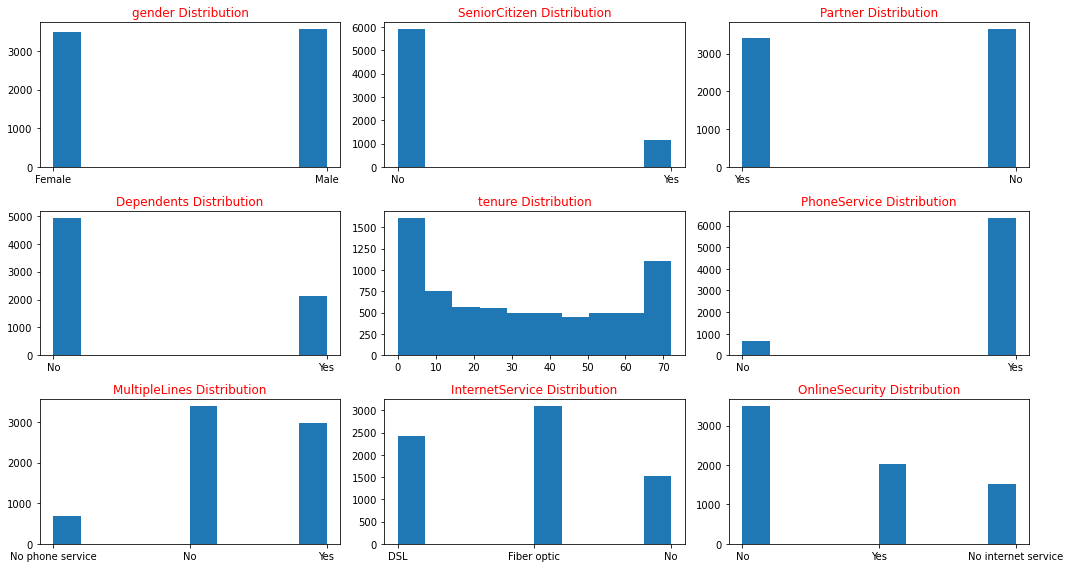

In [45]:
fig, axes = plt.subplots(3,3,figsize=(15,8))
columns = df.columns
for i, ax in enumerate(axes.flatten()):
    ax.hist(df[columns[i]], bins=10)
    ax.set_title(str(columns[i])+' Distribution', color='r')
plt.tight_layout()

### 2) Visualizing the target column

In [46]:
Statistics = df['Churn'].value_counts()
print(Statistics)

No     5174
Yes    1869
Name: Churn, dtype: int64


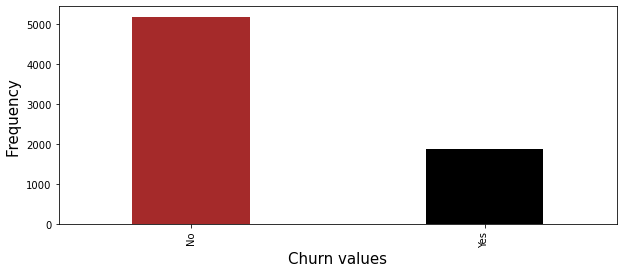

In [47]:
ax = Statistics.plot(kind='bar',figsize=(10,4), width=0.40 ,color=['brown','black'])
ax.set_xlabel("Churn values",fontsize=15)      
ax.set_ylabel("Frequency ",fontsize=15)
plt.show()

### 3) Check correlation

#### i- Categorical variables VS Churn

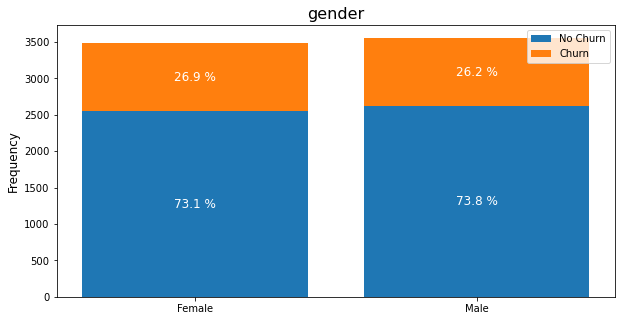

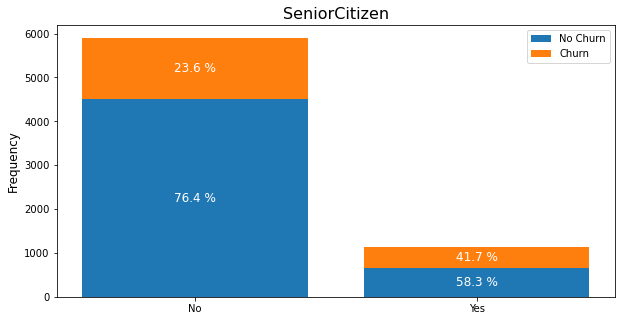

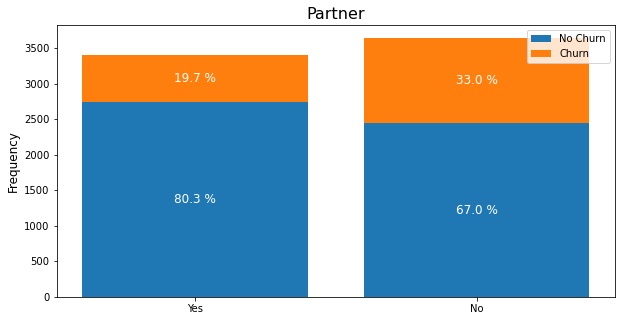

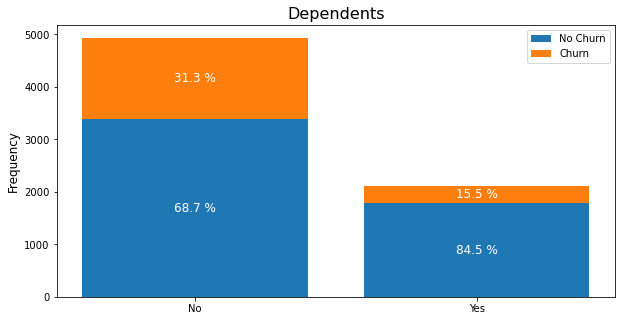

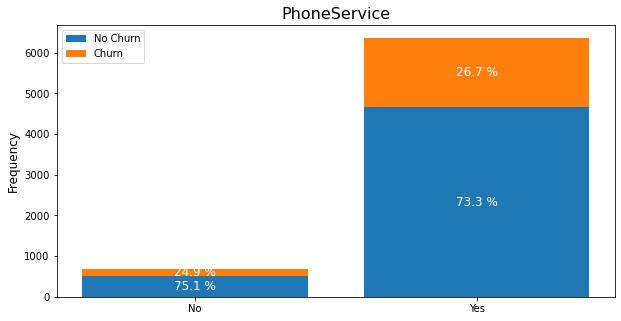

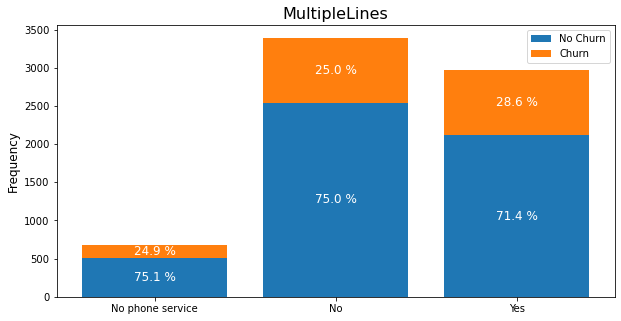

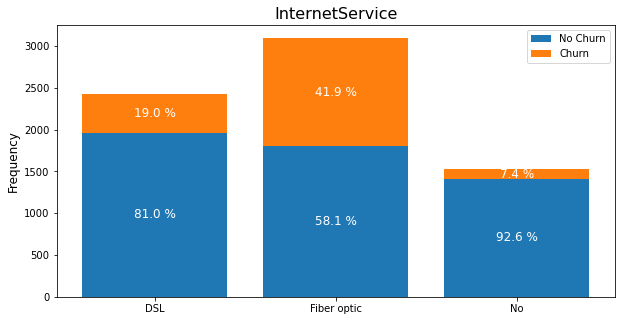

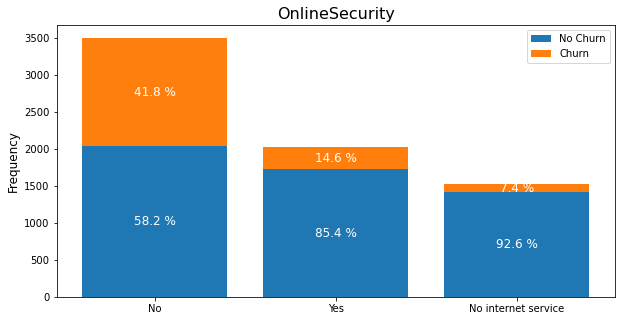

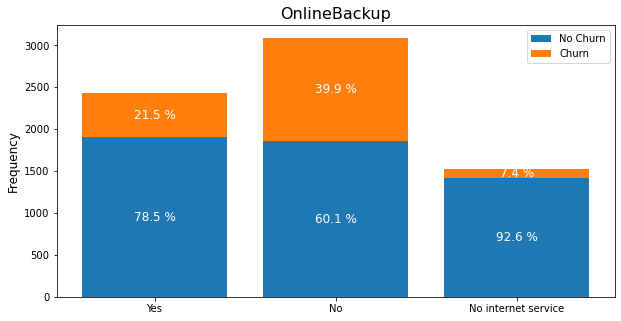

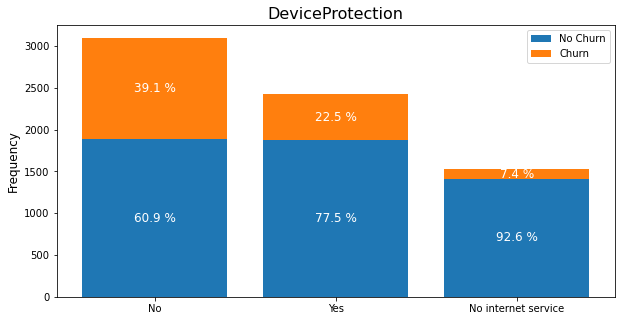

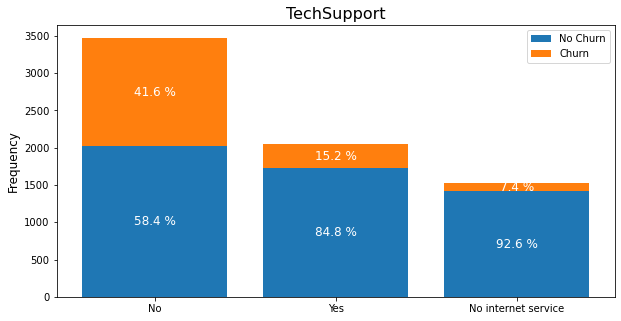

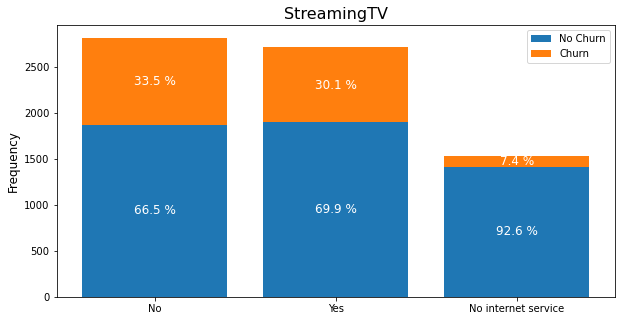

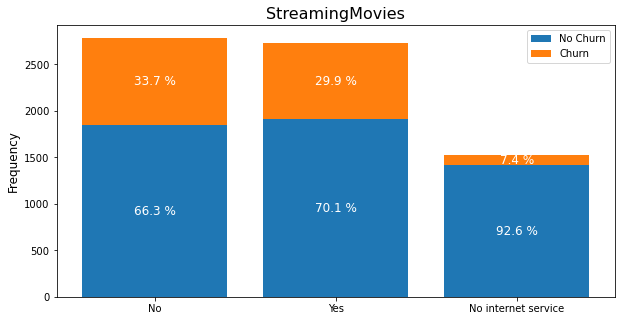

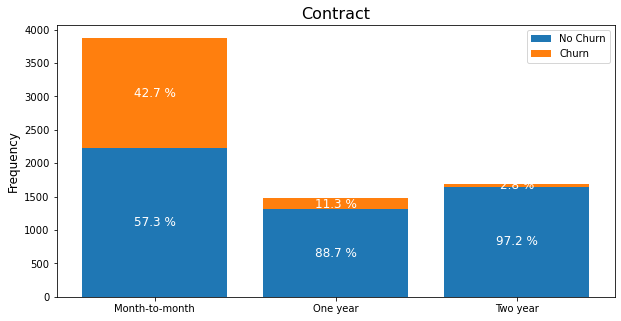

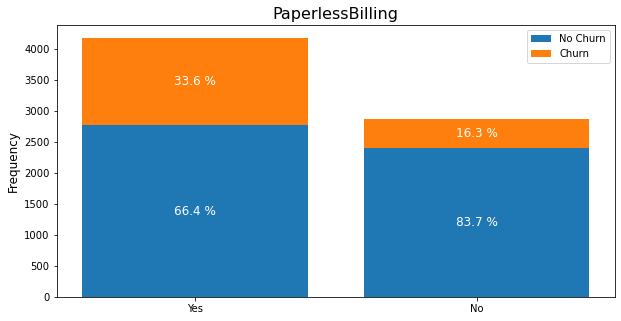

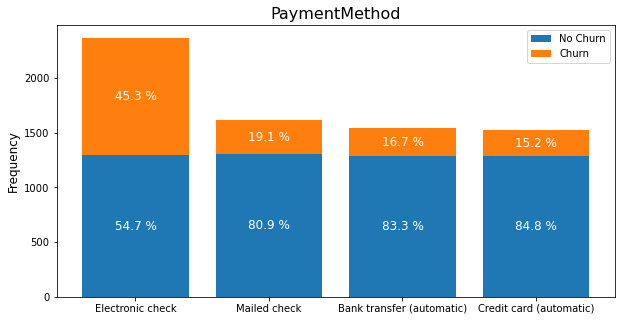

In [48]:
# Since each category has a sub-category: e.g. Gender category has male and female
# We are going to loop through each subcategory and add churn and no churn data to list
for label in categories:
    fig, ax = plt.subplots(figsize = (10,5))
    churn_no = []
    churn_yes = []
    x = []
    for i in df[label].unique():
        churn_no.append(df.groupby([label, 'Churn']).size()[i][0])
        churn_yes.append(df.groupby([label, 'Churn']).size()[i][1])
        x.append(i)
        
    #print(churn_no, churn_yes)
    part1 = plt.bar(x, churn_no)
    part2 = plt.bar(x, churn_yes, bottom=churn_no)

    #Plotting the bar labels inside the bars, as percentage
    for r1, r2, in zip(part1, part2):
        height1 = r1.get_height()
        height2 = r2.get_height()
        plt.text(r1.get_x() + r1.get_width() / 2., #position_x
                 height1 / 2., #position_y
                 f'{round(height1 / (height1 + height2)*100,1)} %', #percentage
                 ha="center", va="center", color="white", fontsize=12)
        
        plt.text(r2.get_x() + r2.get_width() / 2., #position_x
                 height1 + height2 / 2., #position_y
                 f'{round(height2 / (height1 + height2)*100,1)} %', #percentage
                 ha="center", va="center", color="white", fontsize=12)


    

    plt.ylabel('Frequency', fontsize=12)
    plt.legend(['No Churn','Churn'])
    plt.title(label, fontsize=16)
    plt.show()

#### ii- Numeric variables VS Churn

In [49]:
len(df.tenure.unique())

73

Text(0, 0.5, 'Count of Customers')

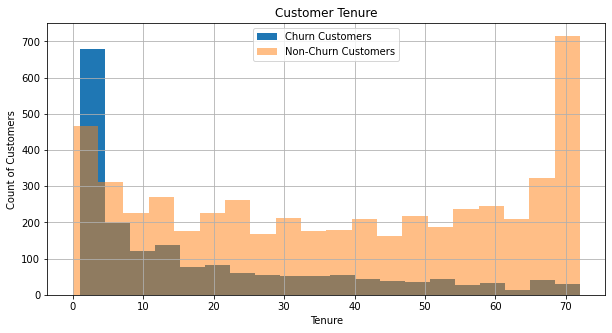

In [50]:
fig, ax = plt.subplots(figsize = (10,5))
df.tenure[df.Churn == 'Yes'].hist(bins=20)
df.tenure[df.Churn == 'No'].hist(bins=20, alpha=0.5)
plt.legend(['Churn Customers', 'Non-Churn Customers'])
plt.title('Customer Tenure')
plt.xlabel('Tenure')
plt.ylabel('Count of Customers')

* The longer a customer stays, the less likely they churn

Text(0, 0.5, 'Count of Customers')

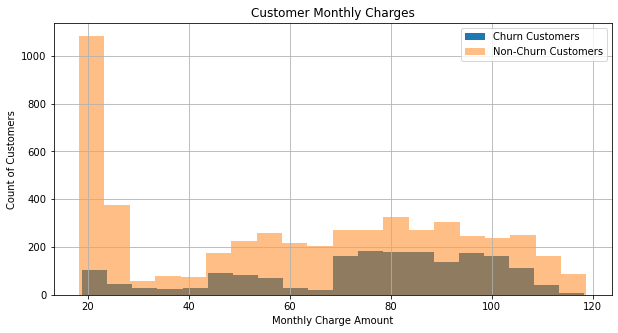

In [51]:
# Continuous variable 'Monthly charges'
fig, ax = plt.subplots(figsize = (10,5))
df.MonthlyCharges[df.Churn == 'Yes'].hist(bins=20)
df.MonthlyCharges[df.Churn == 'No'].hist(bins=20, alpha=0.5)
plt.legend(['Churn Customers', 'Non-Churn Customers'])
plt.title('Customer Monthly Charges')
plt.xlabel('Monthly Charge Amount')
plt.ylabel('Count of Customers')

Text(0, 0.5, 'Count of Customers')

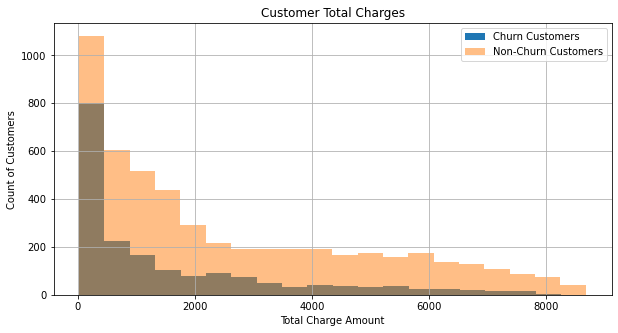

In [52]:
# Continuous variable 'Total charges'
fig, ax = plt.subplots(figsize = (10,5))
df.TotalCharges[df.Churn == 'Yes'].hist(bins=20)
df.TotalCharges[df.Churn == 'No'].hist(bins=20, alpha=0.5)
plt.legend(['Churn Customers', 'Non-Churn Customers'])
plt.title('Customer Total Charges')
plt.xlabel('Total Charge Amount')
plt.ylabel('Count of Customers')

In [53]:
df.groupby('Churn').size()

Churn
No     5174
Yes    1869
dtype: int64

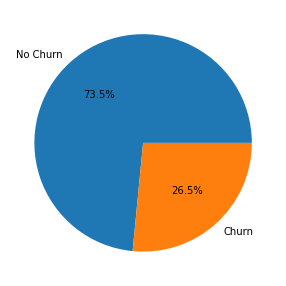

In [54]:
fig, ax = plt.subplots(figsize = (10,5))
labels = 'No Churn', 'Churn'
x = df.groupby('Churn').size().values
ax.pie(x, autopct='%1.1f%%', labels=labels)
plt.show()

### 4) Feature Ingineering

* We'll have to encode all categorical variables in the dataframe because we are going to use a sensitive to scale algorithms

In [55]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [56]:
other = ['Churn']

In [57]:
# We're going to work on a new DataFrame to not modify the original
encoded_df = pd.DataFrame()

In [58]:
for item in categories:
    encoded_df[item] = le.fit_transform(df[item].values)

In [59]:
for item in continuous:
    encoded_df[item] = df[item]

In [60]:
for item in discrete:
    encoded_df[item] = df[item]

In [61]:
for item in other:
    encoded_df[item] = le.fit_transform(df[item].values)

In [62]:
encoded_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,tenure,Churn
0,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,1,0
1,1,0,0,0,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,34,0
2,1,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,2,1
3,1,0,0,0,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,45,0
4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,2,1


In [63]:
def heatMap(df):
    #Create Correlation df
    corr = df.corr()
    #Plot figsize
    fig, ax = plt.subplots(figsize=(15, 15))
    #Generate Heat Map, allow annotations and place floats in map
    sns.heatmap(corr, cmap="Blues", annot=True, fmt=".2f", linewidths=.2)
    #Apply xticks
    plt.xticks(range(len(corr.columns)), corr.columns);
    #Apply yticks
    plt.yticks(range(len(corr.columns)), corr.columns)
    #show plot
    plt.show()

In [64]:
corr_df = encoded_df[encoded_df.columns[0:]].corr()['Churn'][:]

In [65]:
np.abs(corr_df).sort_values(ascending=False)[1:6]

Contract          0.396713
tenure            0.352229
OnlineSecurity    0.289309
TechSupport       0.282492
TotalCharges      0.199484
Name: Churn, dtype: float64

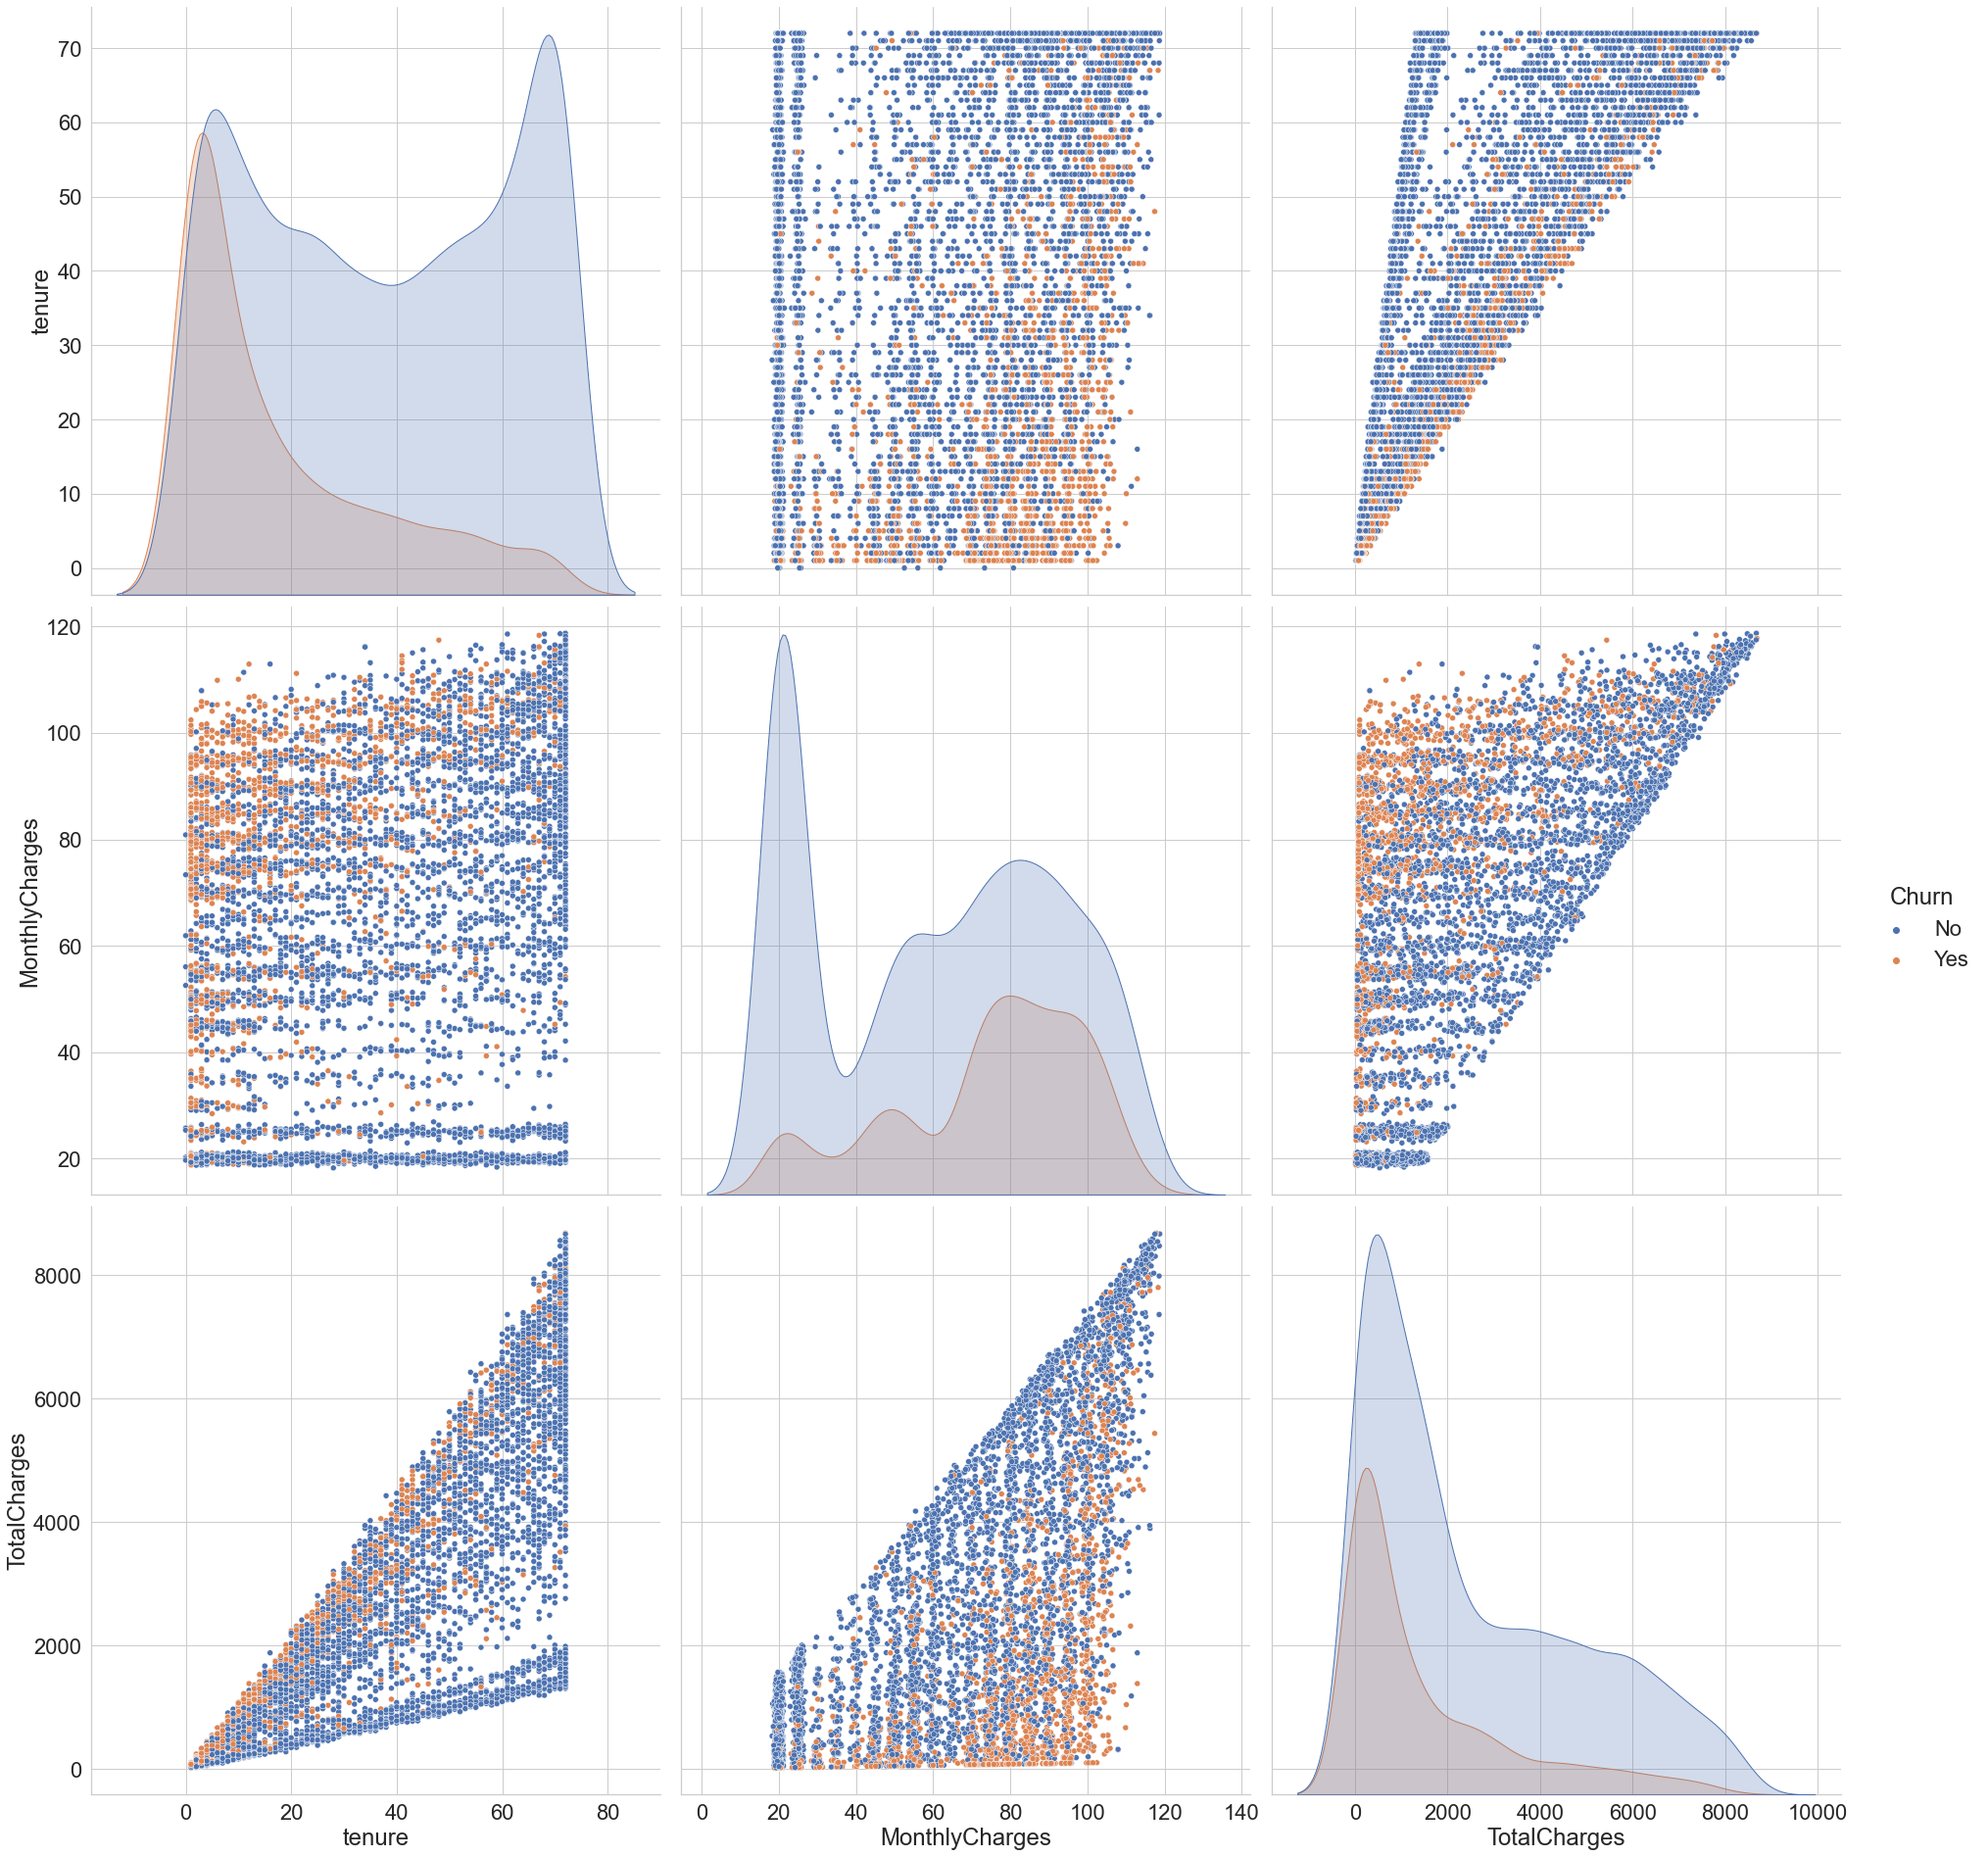

In [66]:
sns.set(font_scale=2)
sns.set_style(style='whitegrid')
sns.pairplot(df, hue="Churn", height=9)

In [67]:
encoded_df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
tenure               0
Churn                0
dtype: int64

In [68]:
encoded_df = encoded_df.fillna(0)

In [69]:
encoded_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,tenure,Churn
0,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,1,0
1,1,0,0,0,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,34,0
2,1,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,2,1
3,1,0,0,0,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,45,0
4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,2,1


In [70]:
features = encoded_df.drop(columns=['Churn', 'gender','PhoneService']).columns

In [71]:
target = ['Churn']

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

In [73]:
down = encoded_df[encoded_df.Churn == 1]
up = encoded_df[encoded_df.Churn == 0]
down = down.Churn.count()
up = up.Churn.count()

In [74]:
#let's first separate majority class and minority class and resample

df_majority = encoded_df[encoded_df.Churn == 0]
df_minority = encoded_df[encoded_df.Churn == 1]


# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=down,     # to match minority class
                                 random_state=42) # reproducible results
# combine the new dataframes
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

df_downsampled.Churn.value_counts()

0    1869
1    1869
Name: Churn, dtype: int64

In [75]:
from sklearn.model_selection import train_test_split
y = df_downsampled[target]
X = df_downsampled[features]

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state=42, stratify=y)

In [77]:
#import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve,\
precision_score, recall_score, precision_recall_curve, classification_report, roc_auc_score

### Logistic Regression

In [78]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=42, max_iter=1000, )

In [85]:
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [86]:
print(classification_report(y_test, y_pred_logreg))
print(f'Accuracy: {accuracy_score(y_test, y_pred_logreg)}')
print(f'Precision: {precision_score(y_test, y_pred_logreg)}')
print(f'Recall: {recall_score(y_test, y_pred_logreg)}')
print(f'Confusion Matrix: {confusion_matrix(y_test, y_pred_logreg)}')

              precision    recall  f1-score   support

           0       0.79      0.76      0.78       187
           1       0.77      0.79      0.78       187

    accuracy                           0.78       374
   macro avg       0.78      0.78      0.78       374
weighted avg       0.78      0.78      0.78       374

Accuracy: 0.7780748663101604
Precision: 0.7708333333333334
Recall: 0.7914438502673797
Confusion Matrix: [[143  44]
 [ 39 148]]


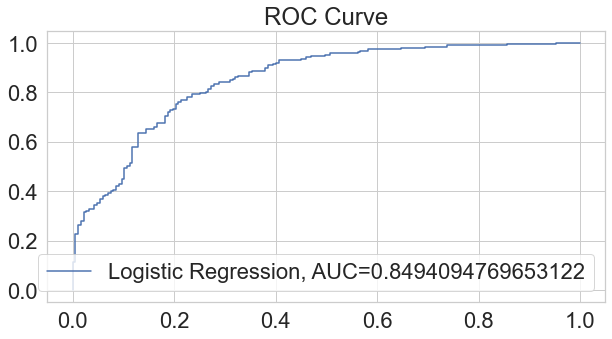

In [87]:
fig, ax = plt.subplots(figsize = (10,5))
y_prob = logreg.predict_proba(X_test)[::,1]
y_pred_proba = y_prob
fpr_rand, tpr_rand, _ = roc_curve(y_test,  y_pred_proba)
auc_rand = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr_rand,tpr_rand,label=f"Logistic Regression, AUC="+str(auc_rand))
plt.legend(loc=4)
plt.title('ROC Curve')
plt.show()

In [88]:
# Grid search cross validation
from sklearn.model_selection import GridSearchCV

grid = {'C': [0.1,0.5,1,10,50,100], 'max_iter': [250], 'fit_intercept':[True],'intercept_scaling':[1],
              'penalty':['l2'], 'tol':[0.00001,0.0001,0.000001]}
log_primal_Grid = GridSearchCV(LogisticRegression(solver='lbfgs'), grid, cv=10, refit=True, verbose=0)
logreg = LogisticRegression()
logreg_CV = GridSearchCV(logreg, grid, cv=5)
logreg_CV.fit(X_train, y_train)

print("tuned hyperparameters: (best_parameters)", logreg_CV.best_params_)
print("accuracy", logreg_CV.best_score_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

tuned hyperparameters: (best_parameters) {'C': 10, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 250, 'penalty': 'l2', 'tol': 1e-05}
accuracy 0.7672477534847519


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

           0       0.79      0.75      0.77       187
           1       0.76      0.80      0.78       187

    accuracy                           0.78       374
   macro avg       0.78      0.78      0.78       374
weighted avg       0.78      0.78      0.78       374

[[141  46]
 [ 38 149]]


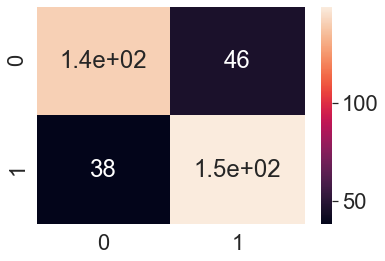

In [89]:
#Best model
from sklearn.metrics import classification_report, confusion_matrix

best_logreg = LogisticRegression(C=100, penalty="l2", max_iter=250)
best_logreg.fit(X_train, y_train)
y_pred = best_logreg.predict(X_test)

cmG = confusion_matrix(y_test, y_pred)
sns.heatmap(cmG, annot=True)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

## Evaluation

In [90]:
grid_predictions = best_logreg.predict(X_test) 

test_accuracy=accuracy_score(y_test,grid_predictions)*100
print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(test_accuracy) )

Accuracy for our testing dataset with tuning is : 77.54%


## KNN

In [91]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn_params={'n_neighbors':range(1,30)}
knn_classifier=GridSearchCV(knn,knn_params,cv=10)
knn_classifier.fit(X_train,y_train)
knn_classifier.best_params_,knn_classifier.best_score_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

({'n_neighbors': 12}, 0.7193823300833687)

In [ ]:
#Best model
best_logreg = KNeighborsClassifier(n_neighbors=12)
best_logreg.fit(X_train, y_train)
y_pred = best_logreg.predict(X_test)

cmG = confusion_matrix(y_test, y_pred)
sns.heatmap(cmG, annot=True)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

## Evaluation

In [92]:
test_accuracy=accuracy_score(y_test,y_pred)*100
print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(test_accuracy) )

Accuracy for our testing dataset with tuning is : 77.54%


## SVM

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

           0       0.61      0.69      0.65       187
           1       0.65      0.57      0.60       187

    accuracy                           0.63       374
   macro avg       0.63      0.63      0.63       374
weighted avg       0.63      0.63      0.63       374

[[129  58]
 [ 81 106]]


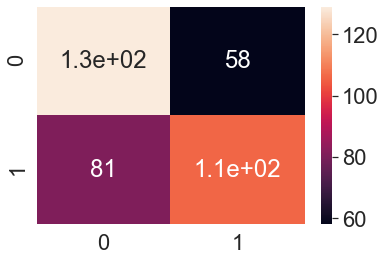

In [93]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train,y_train)
y_predict = svc_model.predict(X_test)

cm = confusion_matrix(y_test,y_predict)
sns.heatmap(cm,annot=True)
print(classification_report(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid= {'C': [50,100,150], 'gamma': [1,0.1,0.01],'probability':[True],'kernel': ['rbf']}
grid=GridSearchCV(SVC(),param_grid,cv=10)
grid.fit(X_train,y_train)
grid.best_params_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

In [ ]:
best_svc = SVC(C= 50, gamma = 0.01, kernel='rbf')
best_svc.fit(X_train,y_train)
y_pred=best_svc.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

## Evaluation

In [ ]:
test_accuracy=accuracy_score(y_test,y_pred)*100
print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(test_accuracy) )